### Importing the libraries

In [912]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,f1_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [913]:
df=pd.read_csv("database_IND.csv")

In [914]:
df.shape

(908, 25)

Dataset has 908 rows and 25 columns.

In [915]:
df.size

22700

Dataset has 22700 number of elements

In [916]:
# Printing the first five rows of the dataframe.
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [917]:
# Printing the last 5 data points
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [918]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Dataset contain object and float types datatypes.

In [919]:
df.get_dtype_counts()

float64    13
object     12
dtype: int64

There are 12 features of object type and 13 are of float type

In [920]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


- Count of columns are not at all equal so there are are missing values.
- The columns other_fuel3,wepp_id and estimated_generation_gwh are having count as zero.
- There is larger deviation between the column values so scaling need to be use.

In [921]:
df.keys()

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [922]:
df.select_dtypes(['object']).head(3)

,country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,Solar,NaN,NaN,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN


### Data cleaning

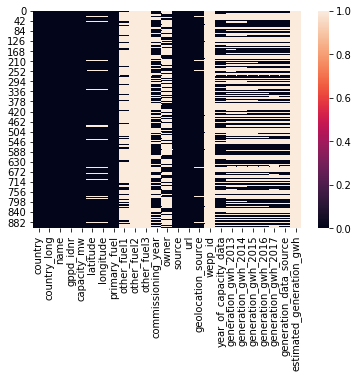

In [923]:
# Checking for any missing valules in dataset
sn.heatmap(df.isnull())

Conclusion:The above graph is here to show that if there are any null values in the above dataset, I have found out that the white line shows the '1' value here, it means that dataset has the empty(Null Values).

In [924]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

- The columns other_fuel3,other_fuel2,wepp_id and estimated_generation_gwh contains all the rows empty so it needs to be removed. 
- There are so many missing values in the dataset.

In [925]:
df1=df.copy()

In [926]:
df1.size

22700

In [927]:
df1.drop(['other_fuel3'],axis=1,inplace=True)

In [928]:
df1.drop(['other_fuel2'],axis=1,inplace=True)

In [929]:
df1.drop(['wepp_id'],axis=1,inplace=True)

In [930]:
df1.drop(['estimated_generation_gwh'],axis=1,inplace=True)

In [931]:
df1.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [932]:
df1.drop(['other_fuel1'],axis=1,inplace=True) #Contains more than 78 percent missing data thats why dropping the column

In [933]:
df1['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [934]:
# Replacing with the most frequenct count of WRI values in geolocation column
df1['geolocation_source'].fillna(df1['geolocation_source'].mode()[0], inplace = True)

In [935]:
df1['generation_data_source'].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [936]:
df1['year_of_capacity_data'].value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

In [937]:
#Replacing with the most frequent count
df1['generation_data_source'].fillna(df1['generation_data_source'].mode()[0], inplace = True)
df1['year_of_capacity_data'].fillna(df1['year_of_capacity_data'].mode()[0], inplace = True)

In [938]:
df1.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source          0
year_of_capacity_data       0
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source      0
dtype: int64

In [939]:
#Replacing the missing values with mean beacuse it contains continous values.
df1['latitude'].fillna(df1['latitude'].mean(), inplace = True)
df1['longitude'].fillna(df1['longitude'].mean(), inplace = True)

In [940]:
#Replacing the missing values with mean beacuse it contains continous values.
df1['generation_gwh_2013'].fillna(df1['generation_gwh_2013'].mean(), inplace = True)
df1['generation_gwh_2014'].fillna(df1['generation_gwh_2014'].mean(), inplace = True)
df1['generation_gwh_2015'].fillna(df1['generation_gwh_2015'].mean(), inplace = True)
df1['generation_gwh_2016'].fillna(df1['generation_gwh_2016'].mean(), inplace = True)
df1['generation_gwh_2017'].fillna(df1['generation_gwh_2017'].mean(), inplace = True)


In [941]:
df1.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source          0
year_of_capacity_data       0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_data_source      0
dtype: int64

Now we can see only two columns contain missing data

In [942]:
df1['commissioning_year'].fillna(df1['commissioning_year'].mode()[0], inplace = True)

In [943]:
df1['owner'].fillna(df1['owner'].mode()[0], inplace = True)

In [944]:
df1.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

Now we can see that there are no missing values in the dataset

### Data Exploration(EDA)

In [945]:
df1['country'].value_counts()

IND    908
Name: country, dtype: int64

In [946]:
df1['country_long'].value_counts()

India    908
Name: country_long, dtype: int64

In [947]:
#Since Country and Country long represent the same data for every 908 rows so removing the columns
df1.drop(['country'],axis=1,inplace=True)
df1.drop(['country_long'],axis=1,inplace=True)

In [948]:
df1['generation_data_source'].nunique()

1

In [949]:
#genration data source contain same value for all field so wont be useful in predicting the fuel type or capacity gwh
df1.drop(['generation_data_source'],axis=1,inplace=True)

In [950]:
df1['name'].nunique()

908

In [951]:
df['gppd_idnr'].nunique()

908

In [952]:
#Since it contain 908 text values different for all the columns so it was unecessary feature.
df1.drop(['name'],axis=1,inplace=True)
df1.drop(['gppd_idnr'],axis=1,inplace=True)

In [953]:
df1.drop(['year_of_capacity_data'],axis=1,inplace=True)

In [954]:
df1.nunique()

capacity_mw            365
latitude               838
longitude              829
primary_fuel             8
commissioning_year      73
owner                  280
source                 191
url                    304
geolocation_source       3
generation_gwh_2013    365
generation_gwh_2014    375
generation_gwh_2015    399
generation_gwh_2016    406
generation_gwh_2017    411
dtype: int64

Coal       0.285242
Hydro      0.275330
Solar      0.139868
Wind       0.135463
Gas        0.075991
Biomass    0.055066
Oil        0.023128
Nuclear    0.009912
Name: primary_fuel, dtype: float64

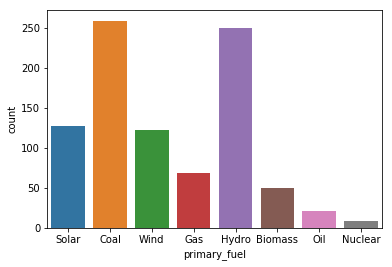

In [958]:
# Visualizing the target variables
sn.countplot(df1['primary_fuel'])
df1['primary_fuel'].value_counts(normalize=True)

The primary fuel Coal and Hydro are showing highest count among all the fuel types and nuclear fuel type shows least count.

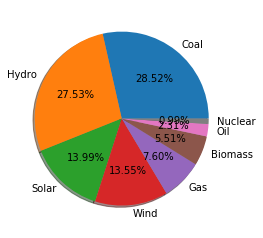

In [959]:
# Pie chart for class variable
labels='Coal','Hydro','Solar','Wind','Gas','Biomass','Oil','Nuclear'
fig,ax=plt.subplots()
ax.pie(df1['primary_fuel'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)
plt.show()

We can see that the Coal and Hydro consititutes about 56 percentage of total fuel type.

- We can see that count of Oil is 196 and other fuel count is one or two.
- But the total rows of dataset are 908 so there are missing values in the dataset

WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

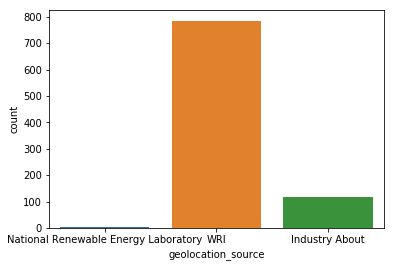

In [963]:
sn.countplot(df1['geolocation_source'])
df1['geolocation_source'].value_counts()

The maximum count of gelocation source can be seen from WRI and least from national renewable energy

In [967]:
###Plotting distribution plot for continous column

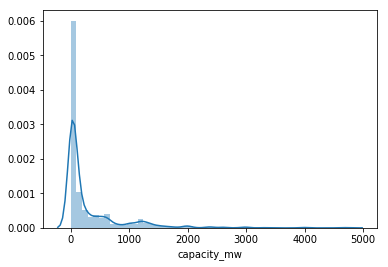

In [969]:
# Target varible
sn.distplot(df1['capacity_mw'])

The distribution plot shows that the data seem to be right skewed

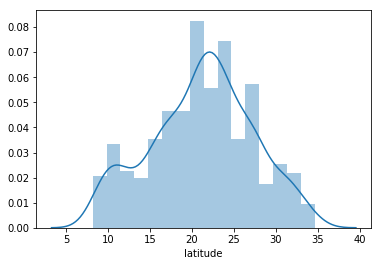

In [971]:
# latitude
sn.distplot(df1['latitude'])

The distribution plot for latitude is normally distributed 

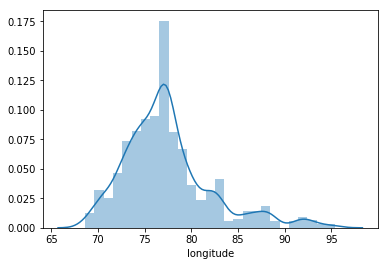

In [974]:
# longitude
sn.distplot(df1['longitude'])

Skewness can be observed from above distribution plot ,it can be removed by using log or power transformation method.

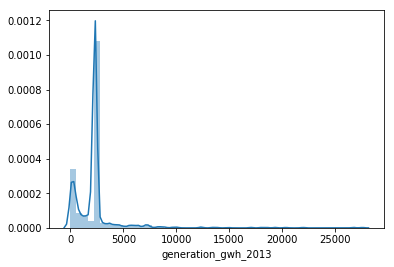

In [973]:
# genration gwh_2013
sn.distplot(df1['generation_gwh_2013'])

Data is highly skewed to the right ,we will need to use transformation method.

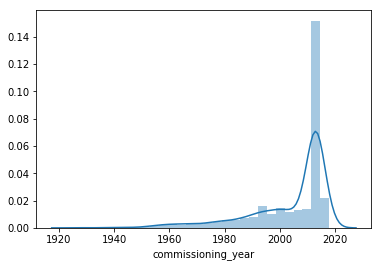

In [979]:
sn.distplot(df1['commissioning_year'])

Data is highly skewed to the left side, we will need to use transformation method.

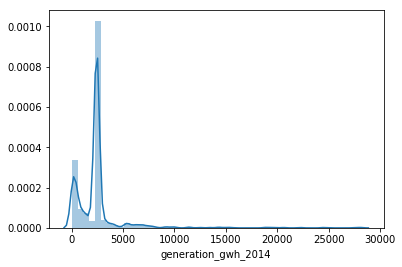

In [975]:
# genration gwh_2014
sn.distplot(df1['generation_gwh_2014'])

Data is highly skewed to the right ,we will need to use transformation method.

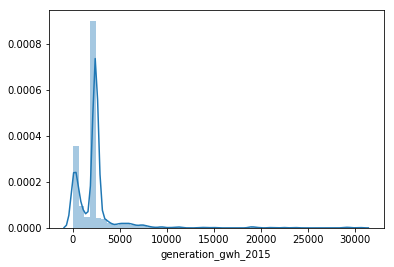

In [976]:
# genration gwh_2015
sn.distplot(df1['generation_gwh_2015'])

Data is highly skewed to the right ,we will need to use transformation method.

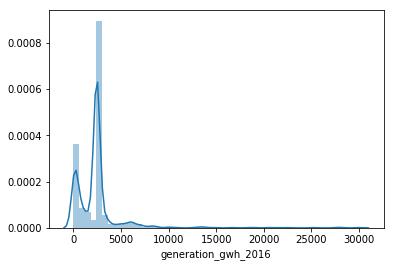

In [977]:
# genration gwh_2016
sn.distplot(df1['generation_gwh_2016'])

Data is highly skewed to the right ,we will need to use transformation method.

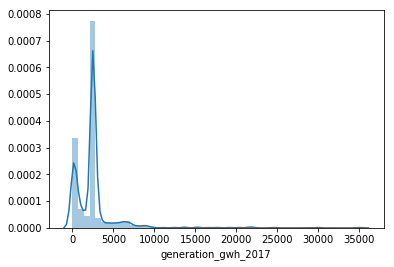

In [978]:
# genration gwh_2017
sn.distplot(df1['generation_gwh_2017'])

Data is highly skewed to the right ,we will need to use transformation method.

In [982]:
numerical=list(df1.select_dtypes(['float64']))

### Plotting box plot

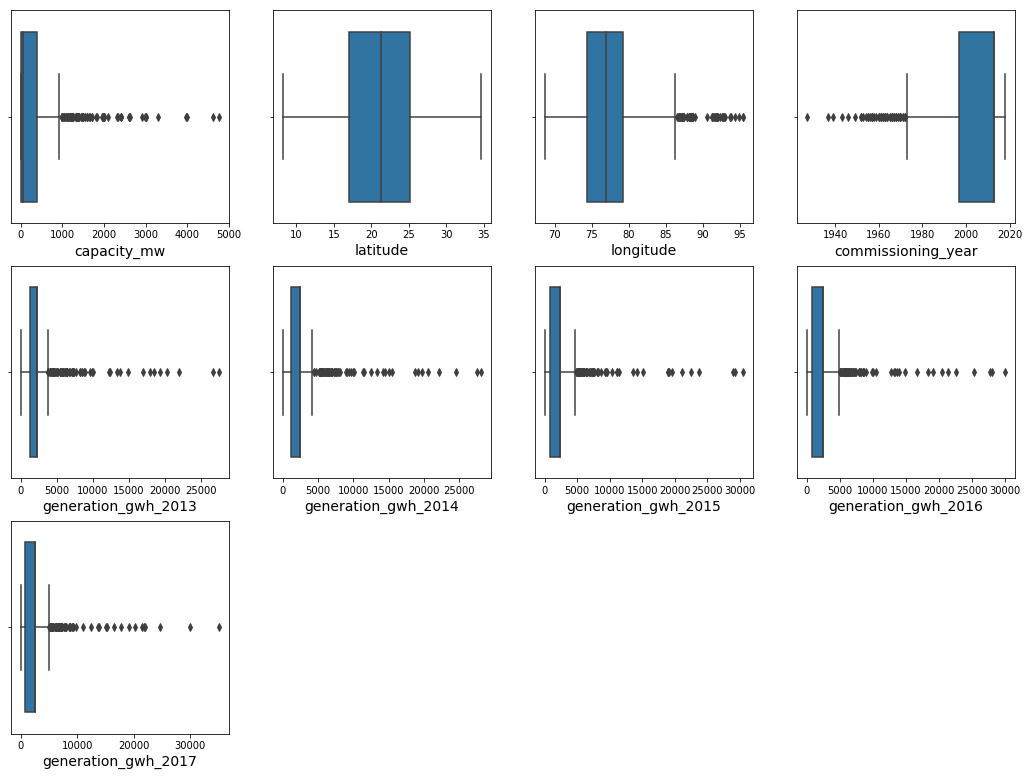

In [983]:
plt.figure(figsize=(18,18),facecolor='white')
plotnumber=1
for column in df1[numerical]:
    if plotnumber<=10:
        ax=plt.subplot(4,4,plotnumber)
        sn.boxplot(df1[column])
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
plt.show()

- We can see that all the columns contains the many outliers so it can be removed using zscore.
- Latitude column does not contain any outliers.

### Bivariate Anaysis

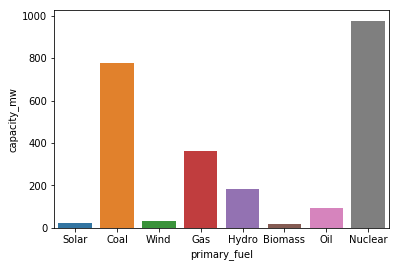

In [987]:
sn.barplot(x="primary_fuel", y="capacity_mw", data=df1,ci=None)

It can be clearly seen that nuclear power plant needs largest electrical capacity(megawatts) followed by Coal plant.

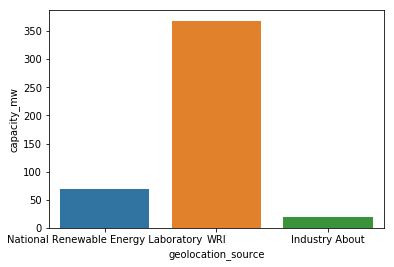

In [988]:
sn.barplot(x="geolocation_source", y="capacity_mw", data=df1,ci=None)

Laboratory WRI requires highest electrical capacity(megawatts) in comparison with others.

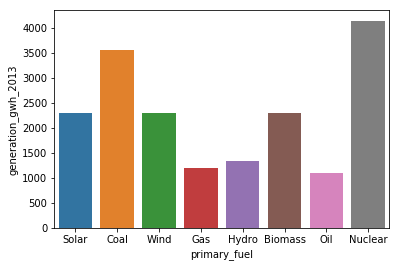

In [990]:
sn.barplot(x="primary_fuel", y="generation_gwh_2013", data=df1,ci=None)

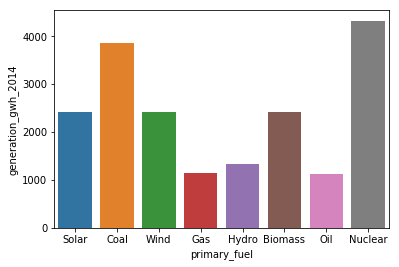

In [991]:
sn.barplot(x="primary_fuel", y="generation_gwh_2014", data=df1,ci=None)

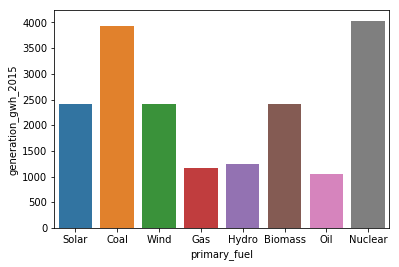

In [992]:
sn.barplot(x="primary_fuel", y="generation_gwh_2015", data=df1,ci=None)

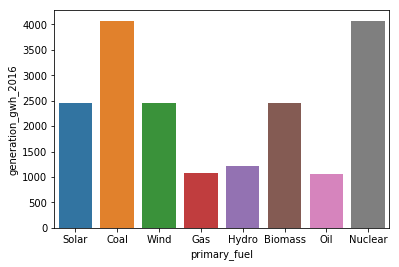

In [996]:
sn.barplot(x="primary_fuel", y="generation_gwh_2016", data=df1,ci=None)

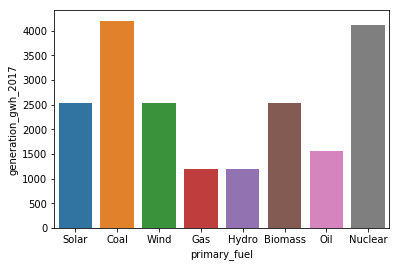

In [997]:
sn.barplot(x="primary_fuel", y="generation_gwh_2017", data=df1,ci=None)

- Inference: We have plotted relationship between electricity generation in gigawatt-hours from the year (2014-2017) with Primary Fuel
- Nuclear thermal plant and Coal power plant can be seen as majority player in electricity generation

In [984]:
df1.select_dtypes(['float64']).head(1)

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,2011.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


### Label Encoding

In [1007]:
# Dropping the unnecessary columns

In [1008]:
df1.drop(['url'],axis=1,inplace=True)
df1.drop(['source'],axis=1,inplace=True)

In [1009]:
df1.drop(['owner'],axis=1,inplace=True)

In [1010]:
df1.drop(['commissioning_year'],axis=1,inplace=True)

In [1012]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['primary_fuel'] = le.fit_transform(df1['primary_fuel'])
df1['geolocation_source']=le.fit_transform(df1['geolocation_source'])

In [1013]:
for col in df1.columns:
    if df1[col].dtypes == 'object': # encoding all categorical columns
        encoder = LabelEncoder()
        df1[col] = encoder.fit_transform(df1[col])
df1.head()

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,1,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,7,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,2,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


### Mutlivariate Anaylsis

In [1014]:
#Finding the correlation values
cor=df1.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,0.049790,0.197124,-0.377783,2.046977e-01,6.678419e-01,7.054341e-01,7.220814e-01,7.528288e-01,7.670398e-01
latitude,0.049790,1.000000,0.031501,-0.013453,-1.839986e-01,3.663949e-02,4.408464e-02,3.612730e-02,3.093239e-02,3.065498e-02
longitude,0.197124,0.031501,1.000000,-0.348710,2.524152e-01,1.402097e-02,1.166872e-02,1.917647e-02,3.975774e-02,4.040690e-02
primary_fuel,-0.377783,-0.013453,-0.348710,1.000000,-4.828029e-01,-1.205116e-01,-1.249997e-01,-1.251376e-01,-1.313584e-01,-1.321741e-01
geolocation_source,0.204698,-0.183999,0.252415,-0.482803,1.000000e+00,-4.314899e-17,-1.111170e-16,-1.004804e-17,1.807415e-16,9.412254e-17
generation_gwh_2013,0.667842,0.036639,0.014021,-0.120512,-4.314899e-17,1.000000e+00,9.634535e-01,8.963761e-01,8.735420e-01,8.306385e-01
generation_gwh_2014,0.705434,0.044085,0.011669,-0.125000,-1.111170e-16,9.634535e-01,1.000000e+00,9.537116e-01,9.260100e-01,8.918721e-01
generation_gwh_2015,0.722081,0.036127,0.019176,-0.125138,-1.004804e-17,8.963761e-01,9.537116e-01,1.000000e+00,9.689693e-01,9.284589e-01
generation_gwh_2016,0.752829,0.030932,0.039758,-0.131358,1.807415e-16,8.735420e-01,9.260100e-01,9.689693e-01,1.000000e+00,9.647861e-01
generation_gwh_2017,0.767040,0.030655,0.040407,-0.132174,9.412254e-17,8.306385e-01,8.918721e-01,9.284589e-01,9.647861e-01,1.000000e+00


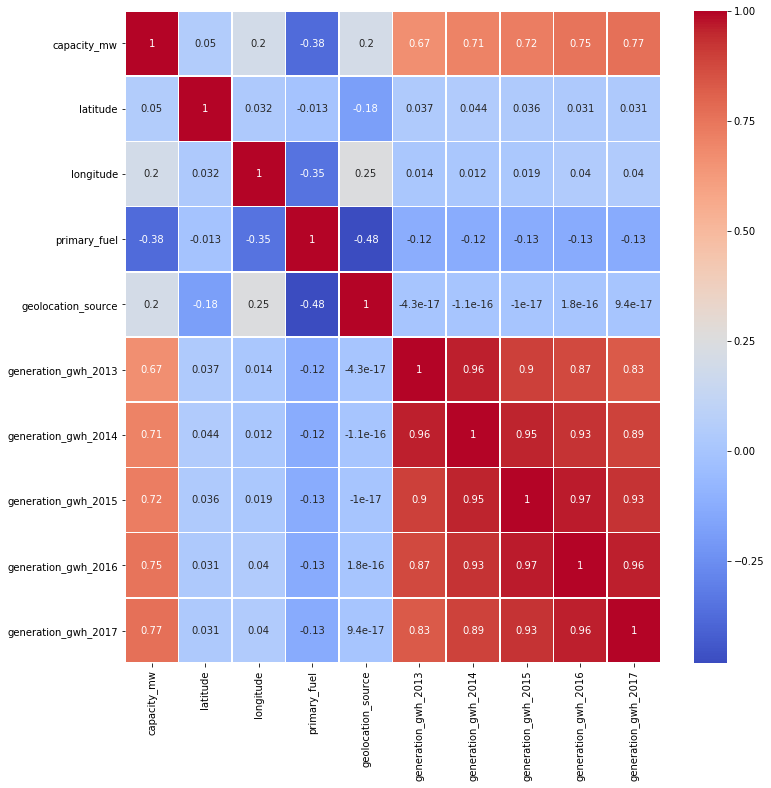

In [1015]:
#Plotting heatmap
corr_matrix=df1.corr()
fig, axis = plt.subplots(figsize=(12, 12))
sn.heatmap(corr_matrix,annot=True,linewidths=.5,cmap='coolwarm')

- electrical generating capacity(capacity_mw) is showing positive correlation with electricity generation for different years.
- Primary fuel and Capacity_mw is showing good positive correlation.

### Removing the outliers

In [1016]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
new_df=df1[(z<3).all(axis=1)]

In [1017]:
df1.shape

(908, 10)

In [1018]:
new_df.shape

(867, 10)

In [1019]:
# Data loss percentage
Data_loss=(df.shape[0]-new_df.shape[0])/df.shape[0]*100
Data_loss

4.5154185022026425

Data loss percentage is less than 4.51 percentage so it feasiable to use z_score

In [824]:
numericals=list(new_df.select_dtypes(['float64']))

In [825]:
numericals

['capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017']

### Checking for skewness

In [826]:
new_df[numericals].skew()

capacity_mw            1.959761
latitude              -0.108981
longitude              0.856984
commissioning_year    -1.589404
generation_gwh_2013    1.543128
generation_gwh_2014    1.453437
generation_gwh_2015    1.335007
generation_gwh_2016    1.358787
generation_gwh_2017    1.254038
dtype: float64

### Using power transformation method

In [827]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')
new_df[numericals]=scaler.fit_transform(new_df[numericals].values)

In [828]:
new_df[numericals].skew()

capacity_mw            0.009182
latitude              -0.071773
longitude             -0.000633
commissioning_year    -1.147362
generation_gwh_2013   -0.179013
generation_gwh_2014   -0.259255
generation_gwh_2015   -0.325673
generation_gwh_2016   -0.322983
generation_gwh_2017   -0.350358
dtype: float64

In [832]:
new_df.head(4)

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-1.670280,1.158532,-0.931358,6,1,0.313946,0.337762,0.366288,0.369859,0.367617
1,0.203416,0.593626,-0.513093,1,2,0.313946,0.337762,0.366288,0.369859,0.367617
2,-0.292512,0.123842,-2.351188,7,2,0.313946,0.337762,0.366288,0.369859,0.367617
3,0.376538,0.446378,2.510259,2,2,-1.046220,-1.027342,-0.706174,-0.657892,-0.878163


### Task 1: To Predict the Capacity_mw

### Splitting the data into input and target variables

In [833]:
x = new_df.drop(['capacity_mw'], axis = 1)
y=new_df['capacity_mw']

In [834]:
print(x.shape)
x.head()

(835, 9)


,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,1.158532,-0.931358,6,1,0.313946,0.337762,0.366288,0.369859,0.367617
1,0.593626,-0.513093,1,2,0.313946,0.337762,0.366288,0.369859,0.367617
2,0.123842,-2.351188,7,2,0.313946,0.337762,0.366288,0.369859,0.367617
3,0.446378,2.510259,2,2,-1.046220,-1.027342,-0.706174,-0.657892,-0.878163
4,0.133083,1.273660,1,2,-0.124881,0.682130,1.896185,1.929520,1.559315


In [835]:
print(y.shape)
y.head()

(835,)


0   -1.670280
1    0.203416
2   -0.292512
3    0.376538
4    1.754513
Name: capacity_mw, dtype: float64

### Creating train test split

In [836]:
# Splitting the dataset into trianing and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [837]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
lr_score=r2_score(y_test,y_pred)
print("R2 score from Linear regression is",lr_score)
lr_cv=cross_val_score(regressor,x,y,scoring='r2',cv=5).mean()
lr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',lr_mae)
lr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',lr_mse)
print("Cross validation score is ",lr_cv)

R2 score from Linear regression is 0.39271254709325587
Mean absolute error :  0.709635931115798
Mean Squared error : 0.6754738296198656
Cross validation score is  0.36239032320120323


In [838]:
# Support Vector Regression
from sklearn.svm import SVR
SR = SVR()
SR.fit(x, y)
y_pred=SR.predict(x_test)
svr_score=r2_score(y_test,y_pred)
print("R2 score from Support Vector regression is",svr_score)
svr_cv=cross_val_score(SR,x,y,scoring='r2',cv=5).mean()
svr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',svr_mae)
svr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',svr_mse)
print("Cross validation score is ",svr_cv)

R2 score from Support Vector regression is 0.6873140248843133
Mean absolute error :  0.4329046504288115
Mean Squared error : 0.3477944292589374
Cross validation score is  0.6050390937818686


In [839]:
# K nearest neighbors
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x, y)
y_pred=neigh.predict(x_test)
knn_score=r2_score(y_test,y_pred)
print("R2 score from K Nearest Neighbors regression is",knn_score)
knn_cv=cross_val_score(neigh,x,y,scoring='r2',cv=5).mean()
knn_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',knn_mae)
knn_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',knn_mse)
print("Cross validation score is ",knn_cv)

R2 score from K Nearest Neighbors regression is 0.9170069003176557
Mean absolute error :  0.214582951917419
Mean Squared error : 0.09231158425244947
Cross validation score is  0.6521230133995711


In [840]:
from sklearn.ensemble import RandomForestRegressor
RFR= RandomForestRegressor()
RFR.fit(x_train, y_train)
y_pred=RFR.predict(x_test)
rfr_score=r2_score(y_test,y_pred)
print("R2 score from Random Forest regression is",rfr_score)
rfr_cv=cross_val_score(RFR,x,y,scoring='r2',cv=5).mean()
rfr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',rfr_mae)
rfr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',rfr_mse)
print("Cross validation score is ",rfr_cv)

R2 score from Random Forest regression is 0.8382818302303024
Mean absolute error :  0.3111855019017037
Mean Squared error : 0.17987592355251192
Cross validation score is  0.7878697040889747


In [841]:
# Creting dataframe to store accuracy,f1 score and cv score of all the models.
model=['Linear Regression','Support Vector Regressor',' K Nearest Neighbors regression','Random Forest Regressor']

acc=[lr_score*100,svr_score*100,knn_score*100,rfr_score*100]

cv_score=[lr_cv*100,svr_cv*100,knn_cv*100,rfr_cv*100]


diff=[acc[0]-cv_score[0],acc[1]-cv_score[1],acc[2]-cv_score[2],acc[3]-cv_score[3]]
diff
result=pd.DataFrame({'Model':model,'R2_score':acc,'Cross Validation_score':cv_score,'Difference':diff})
result

,Model,R2_score,Cross Validation_score,Difference
0,Linear Regression,39.271255,36.239032,3.032222
1,Support Vector Regressor,68.731402,60.503909,8.227493
2,K Nearest Neighbors regression,91.700690,65.212301,26.488389
3,Random Forest Regressor,83.828183,78.786970,5.041213


### Choosing the Model 

- I am going to choose the Random Forest Regressor as best model because it is giving highest R2 score approximately 84 and least difference of 5 between R2 and Cross validation score

### Applying hyperparameter to the best accuracy model

In [842]:
parameters= {
    'n_estimators': [70,100],
    'max_depth': [5,10,18],
    'min_samples_split':[2,3,4],
    'criterion':['mse', 'mae'],
    }

In [843]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [844]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [5, 10, 18],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [70, 100]})

In [845]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 10,
 'min_samples_split': 4,
 'n_estimators': 70}

In [867]:
Final_model=RandomForestRegressor(n_estimators=70,criterion='mae',max_depth=10,min_samples_split=4)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
rfr_score=r2_score(y_test,y_pred)
print("R2 score from Random Forest regression is",rfr_score*100)
rfr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',rfr_mae)

R2 score from Random Forest regression is 83.82818302303025
Mean absolute error :  0.3111855019017037


### Saving the model

In [864]:
from sklearn.externals import joblib

In [865]:
joblib.dump(Final_model,'Final_Model.pkl')

['Final_Model.pkl']

### Task 2 : Predicting fuel type using classification algorithms

In [737]:
df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [738]:
df1['primary_fuel'].value_counts()

1    259
3    250
6    127
7    123
2     69
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

- Encoded values for fuel type fields are as follows:-
- Biomass-0,
Coal-1, 
Gas-2,
Hydro-3,
Nuclear-4,
Oil-5, 
Solar-6,
Wind-7

### Separating the target variable Primary Fuel and independent variables

In [739]:
x = new_df.drop(['primary_fuel'], axis = 1)
y=new_df['primary_fuel']

### Creating train test split

In [740]:
# Splitting the dataset into trianing and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

### Applying different models on the dataset

Accuracy of Decision Tree classification is  71.31474103585657
F1 Score is  71.95397711767892
Cross validation score 69.46107784431138
              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.78      0.67      0.72        78
           2       0.35      0.44      0.39        18
           3       0.77      0.75      0.76        71
           4       0.00      0.00      0.00         1
           5       0.44      0.80      0.57         5
           6       0.93      0.93      0.93        28
           7       0.72      0.74      0.73        38

    accuracy                           0.71       251
   macro avg       0.57      0.62      0.59       251
weighted avg       0.73      0.71      0.72       251


 Confusion Matrix


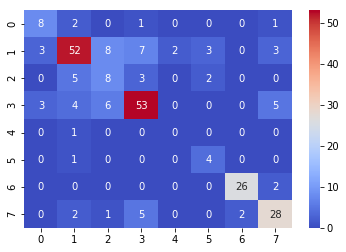

In [741]:
# Using Decision Tree Classification algorithm
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
dtc_acc=accuracy_score(y_test,pred)
print("Accuracy of Decision Tree classification is ",dtc_acc*100)
dtc_f1=f1_score(y_test,pred,average='weighted')
print("F1 Score is ",dtc_f1*100)
dtc_cv=cross_val_score(DTC,x,y,cv=5).mean()
print("Cross validation score",dtc_cv*100)
#Printing confusion matrix
con_mat = confusion_matrix(y_test,pred)
dtc_acc1=classification_report(y_test,pred)
print(dtc_acc1)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

Accuracy of Random Forest Classificarion is  74.10358565737052
F1 Score is  73.165723561404
Cross validation score 75.688622754491
-------------------------------
              precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       0.78      0.74      0.76        78
           2       0.67      0.22      0.33        18
           3       0.68      0.76      0.72        71
           4       0.00      0.00      0.00         1
           5       0.50      0.80      0.62         5
           6       0.96      0.93      0.95        28
           7       0.74      0.82      0.78        38

    accuracy                           0.74       251
   macro avg       0.62      0.63      0.60       251
weighted avg       0.74      0.74      0.73       251

-------------------------------

 Confusion Matrix


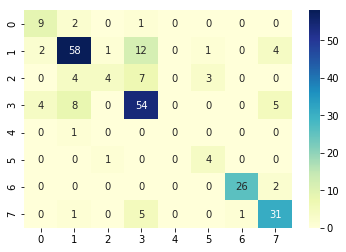

In [743]:
#Using random forest classification
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier() # creating instance of class
RF.fit(x_train,y_train) #Fitting the data
pred=RF.predict(x_test) # Predicting the data 
rfc_acc=accuracy_score(y_test,pred)
print("Accuracy of Random Forest Classificarion is ",rfc_acc*100)
rfc_f1=f1_score(y_test,pred,average='weighted')
print("F1 Score is ",rfc_f1*100)
rfc_cv=cross_val_score(RF,x,y,cv=5).mean()
print("Cross validation score",rfc_cv*100)
print('-------------------------------')
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Accuracy of Support Vector Classification is  63.745019920318725
F1 Score is  60.76796452304912
Cross validation score 65.86826347305389
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.68      0.69      0.69        78
           2       0.75      0.17      0.27        18
           3       0.63      0.61      0.62        71
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5
           6       1.00      0.93      0.96        28
           7       0.46      0.89      0.61        38

    accuracy                           0.64       251
   macro avg       0.44      0.41      0.39       251
weighted avg       0.63      0.64      0.61       251


 Confusion Matrix


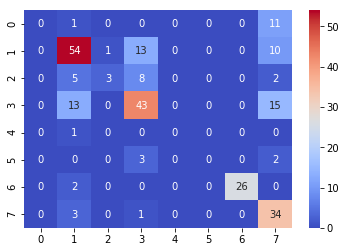

In [744]:
#Using Support vector classification
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
svc_acc=accuracy_score(y_test,pred)
print("Accuracy of Support Vector Classification is ",svc_acc*100)
svc_f1=f1_score(y_test,pred,average='weighted')
print("F1 Score is ",svc_f1*100)
svc_cv=cross_val_score(svc,x,y,cv=5).mean()
print("Cross validation score",svc_cv*100)
svc_acc1=classification_report(y_test,pred)
print(svc_acc1)
con_mat = confusion_matrix(y_test,pred)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

Accuracy score using gradient boosting classifier model is 73.30677290836654
F1 Score is  73.05647269040595
Cross validation score 72.69461077844312
              precision    recall  f1-score   support

           0       0.33      0.33      0.33        12
           1       0.76      0.76      0.76        78
           2       0.64      0.39      0.48        18
           3       0.77      0.82      0.79        71
           4       0.00      0.00      0.00         1
           5       0.50      0.60      0.55         5
           6       0.90      0.93      0.91        28
           7       0.71      0.71      0.71        38

    accuracy                           0.73       251
   macro avg       0.58      0.57      0.57       251
weighted avg       0.73      0.73      0.73       251


 Confusion Matrix


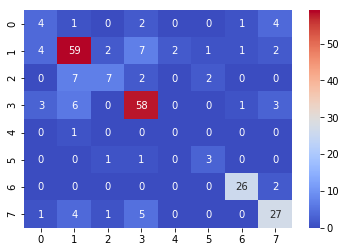

In [745]:
### using gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier()
clf.fit(x_train, y_train)
pred=clf.predict(x_test)
gbc_acc=accuracy_score(y_test,pred)
print('Accuracy score using gradient boosting classifier model is',gbc_acc*100)
gbc_f1=f1_score(y_test,pred,average='weighted')
print("F1 Score is ",gbc_f1*100)
gbc_cv=cross_val_score(clf,x,y,cv=5).mean()
print("Cross validation score",gbc_cv*100)
gbc_acc1=classification_report(y_test,pred)
print(gbc_acc1)
con_mat = confusion_matrix(y_test,pred)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

In [753]:
# Creting dataframe to store accuracy,f1 score and cv score of all the models.
model=['Decision Tree Classifier','Random Forest Classifier','Support Vector Classifier','Gradient Boosting classifier']

acc=[dtc_acc*100,rfc_acc*100,svc_acc*100,gbc_acc*100]

cv_score=[dtc_cv*100,rfc_cv*100,svc_cv*100,gbc_cv*100]

f1_score=[dtc_f1*100,rfc_f1*100,svc_f1*100,gbc_f1*100]

diff=[acc[0]-cv_score[0],cv_score[1]-acc[1],cv_score[2]-acc[2],acc[3]-cv_score[3]]
diff
result=pd.DataFrame({'Model':model,'F1_score':f1_score,'Cross Validation_score':cv_score,'Accuracy Score':acc})
result

,Model,F1_score,Cross Validation_score,Accuracy Score
0,Decision Tree Classifier,71.953977,69.461078,71.314741
1,Random Forest Classifier,73.165724,75.688623,74.103586
2,Support Vector Classifier,60.767965,65.868263,63.745020
3,Gradient Boosting classifier,73.056473,72.694611,73.306773


### Choosing a model

- We will be using F1 score as evaluation metrics because class is imbalanced.
- Choosing the Random Forest Classifier as best model ,in comparions with all model it is giving highest F1 score of 73.16.

### Applying hyperparameter to best accuracy model

In [746]:
parameters= {
    'n_estimators': [70,100],
    'max_depth': [18,20,22],
    'max_features':['auto','sqrt','log2'],
    'criterion':['gini', 'entropy'],
    }

In [747]:
from sklearn.model_selection import GridSearchCV

In [748]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [574]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [18, 20, 22],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [70, 100]})

In [575]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 22,
 'max_features': 'log2',
 'n_estimators': 100}

Accuracy of the model using Random Forest classifier is  76.09561752988047
F1 Score is  75.31202469359616
              precision    recall  f1-score   support

           0       0.69      0.92      0.79        12
           1       0.80      0.76      0.78        78
           2       0.62      0.28      0.38        18
           3       0.72      0.77      0.75        71
           4       0.00      0.00      0.00         1
           5       0.50      0.80      0.62         5
           6       0.96      0.93      0.95        28
           7       0.74      0.82      0.78        38

    accuracy                           0.76       251
   macro avg       0.63      0.66      0.63       251
weighted avg       0.76      0.76      0.75       251

-------------------------------

 Confusion Matrix


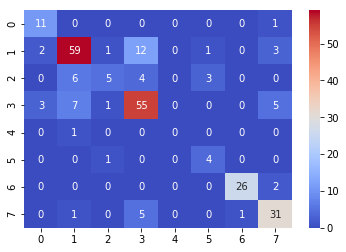

In [749]:
Final_model=RandomForestClassifier(n_estimators=70,criterion='gini',max_features='auto',max_depth=18,random_state=42)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc_final=accuracy_score(y_test,pred)
print("Accuracy of the model using Random Forest classifier is ",acc_final*100)
f1_final=f1_score(y_test,pred,average='weighted')
print("F1 Score is ",f1_final*100)
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

### Conclusion 

- After performing hyperparameter tuning the Random forest classifier achieved f1 score from 73.16 to  75.31

### Saving the model

In [751]:
import joblib
import sys
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.externals import joblib

In [752]:
joblib.dump(Final_model,'Final_Model_2.pkl')

['Final_Model_2.pkl']